This code is part of the lab forum at AAAI-25 on "Developing explainable multimodal AI models with hands-on lab on the life-cycle of rare event prediction in manufacturing"

In this code, we will see how to load a manufacturing-specifc dataset and do exploratory analysis.

#The datasets used in this lab can be downloaded from

1. Pulp and paper manufacturing dataset: https://drive.google.com/file/d/1BQuWml4T18DoTf39eNeYyiX5yrYTtY7p/view?usp=drive_link
2. Future factories multimodal dataset: https://drive.google.com/drive/folders/1l7_Blmk_RrsLHqcW_4F7-ELtll_ZGyDv
3. Future factories image dataset: https://drive.google.com/drive/folders/1VdIsSouurlVAFRLaZnPuemsDXLyKRN-2?usp=drive_link

#Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load a Time Series Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Preprocessed_FF_Data/Multi-modal Dataset/FF_Multimodal.csv")

# converting the time column (which is in MM:SS.s format) into a 12-hour AM/PM format (hh:mm:ss AM/PM)
df['time'] = df['time'].apply(lambda t: pd.to_datetime(f"00:{t}", format='%H:%M:%S.%f').strftime('%I:%M:%S %p'))

df.head(n=5)

<ipython-input-3-43586ea77a2a>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Preprocessed_FF_Data/Multi-modal Dataset/FF_Multimodal.csv")


,time,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,I_R01_Gripper_Pot,...,I_SafetyDoor1_Status,I_SafetyDoor2_Status,Q_Cell_CycleCount,I_MHS_GreenRocketTray,Cam1,Cam2,Description,CycleState,Cycle_Count_New,actual_state
0,12:50:52 AM,73.130005,72.13002,73.13002,73.363525,111,83,111,111,5269,...,True,True,1,True,Dataset/BATCH1000/000000_0.png,Dataset/BATCH1000/000000_1.png,NoNose,2,1,Normal
1,12:50:52 AM,73.130005,72.13002,73.13002,73.363525,111,83,111,111,5277,...,True,True,1,True,Dataset/BATCH1000/000001_0.png,Dataset/BATCH1000/000001_1.png,NoNose,2,1,Normal
2,12:50:52 AM,73.130005,72.13002,73.13002,73.363525,111,83,111,111,4914,...,True,True,1,True,Dataset/BATCH1000/000002_0.png,Dataset/BATCH1000/000002_1.png,NoNose,2,1,Normal
3,12:50:53 AM,73.130005,72.13002,73.13002,73.352539,111,83,111,111,5235,...,True,True,1,True,Dataset/BATCH1000/000003_0.png,Dataset/BATCH1000/000003_1.png,NoNose,2,1,Normal
4,12:50:53 AM,73.130005,72.13002,73.13002,73.352539,111,83,111,111,5311,...,True,True,1,True,Dataset/BATCH1000/000004_0.png,Dataset/BATCH1000/000004_1.png,NoNose,2,1,Normal


In [4]:
df.actual_state.value_counts()

,count
actual_state,
Normal,90775
"NoNose,NoBody2,NoBody1",26628
"NoNose,NoBody2",25206
NoNose,19307
NoBody1,1849
"NoBody2,NoBody1",1089
NoBody2,1078
E_STOPPED,69


#View Basic Dataset Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166001 entries, 0 to 166000
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   time                      166001 non-null  object 
 1   Q_VFD1_Temperature        166001 non-null  float64
 2   Q_VFD2_Temperature        166001 non-null  float64
 3   Q_VFD3_Temperature        166001 non-null  float64
 4   Q_VFD4_Temperature        166001 non-null  float64
 5   M_Conv1_Speed_mmps        166001 non-null  int64  
 6   M_Conv2_Speed_mmps        166001 non-null  int64  
 7   M_Conv3_Speed_mmps        166001 non-null  int64  
 8   M_Conv4_Speed_mmps        166001 non-null  int64  
 9   I_R01_Gripper_Pot         166001 non-null  int64  
 10  I_R01_Gripper_Load        166001 non-null  int64  
 11  I_R02_Gripper_Pot         166001 non-null  int64  
 12  I_R02_Gripper_Load        166001 non-null  int64  
 13  I_R03_Gripper_Pot         166001 non-null  i

In [6]:
# 1. Basic Inspection
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (166001, 51)

Column Names: Index(['time', 'Q_VFD1_Temperature', 'Q_VFD2_Temperature',
       'Q_VFD3_Temperature', 'Q_VFD4_Temperature', 'M_Conv1_Speed_mmps',
       'M_Conv2_Speed_mmps', 'M_Conv3_Speed_mmps', 'M_Conv4_Speed_mmps',
       'I_R01_Gripper_Pot', 'I_R01_Gripper_Load', 'I_R02_Gripper_Pot',
       'I_R02_Gripper_Load', 'I_R03_Gripper_Pot', 'I_R03_Gripper_Load',
       'I_R04_Gripper_Pot', 'I_R04_Gripper_Load', 'M_R01_SJointAngle_Degree',
       'M_R01_LJointAngle_Degree', 'M_R01_UJointAngle_Degree',
       'M_R01_RJointAngle_Degree', 'M_R01_BJointAngle_Degree',
       'M_R01_TJointAngle_Degree', 'M_R02_SJointAngle_Degree',
       'M_R02_LJointAngle_Degree', 'M_R02_UJointAngle_Degree',
       'M_R02_RJointAngle_Degree', 'M_R02_BJointAngle_Degree',
       'M_R02_TJointAngle_Degree', 'M_R03_SJointAngle_Degree',
       'M_R03_LJointAngle_Degree', 'M_R03_UJointAngle_Degree',
       'M_R03_RJointAngle_Degree', 'M_R03_BJointAngle_Degree',
       'M_R03_TJointAngle_D

# Exploratory Data Analysis

In [7]:
#Removing categorical variables
df = df.drop(columns=["Cycle_Count_New","Description"])

In [8]:
#Check for Missing Values

time                        0
Q_VFD1_Temperature          0
Q_VFD2_Temperature          0
Q_VFD3_Temperature          0
Q_VFD4_Temperature          0
M_Conv1_Speed_mmps          0
M_Conv2_Speed_mmps          0
M_Conv3_Speed_mmps          0
M_Conv4_Speed_mmps          0
I_R01_Gripper_Pot           0
I_R01_Gripper_Load          0
I_R02_Gripper_Pot           0
I_R02_Gripper_Load          0
I_R03_Gripper_Pot           0
I_R03_Gripper_Load          0
I_R04_Gripper_Pot           0
I_R04_Gripper_Load          0
M_R01_SJointAngle_Degree    0
M_R01_LJointAngle_Degree    0
M_R01_UJointAngle_Degree    0
M_R01_RJointAngle_Degree    0
M_R01_BJointAngle_Degree    0
M_R01_TJointAngle_Degree    0
M_R02_SJointAngle_Degree    0
M_R02_LJointAngle_Degree    0
M_R02_UJointAngle_Degree    0
M_R02_RJointAngle_Degree    0
M_R02_BJointAngle_Degree    0
M_R02_TJointAngle_Degree    0
M_R03_SJointAngle_Degree    0
M_R03_LJointAngle_Degree    0
M_R03_UJointAngle_Degree    0
M_R03_RJointAngle_Degree    0
M_R03_BJoi

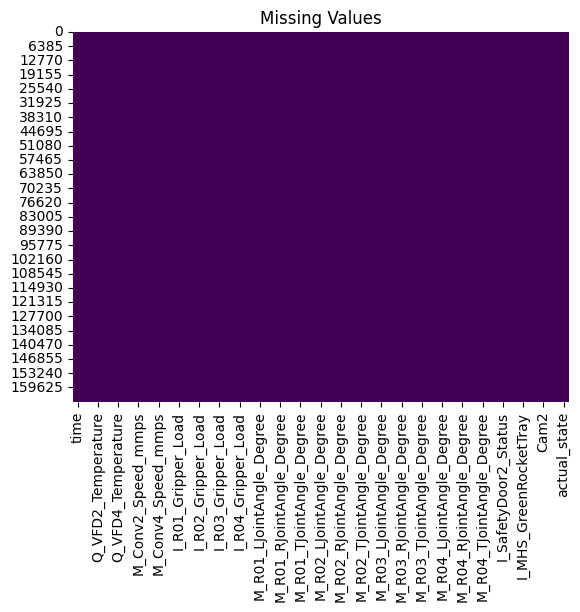

In [9]:
# Count missing values
print(df.isnull().sum())

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values')
plt.show()

# Visualize the Time Series Data


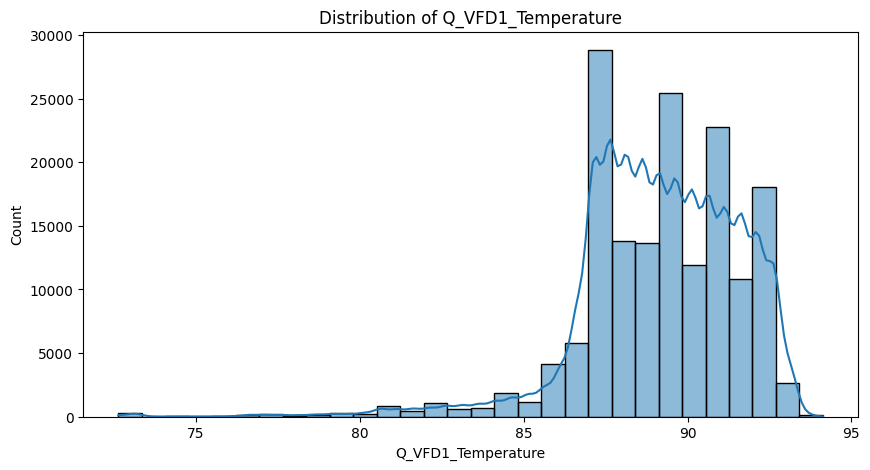

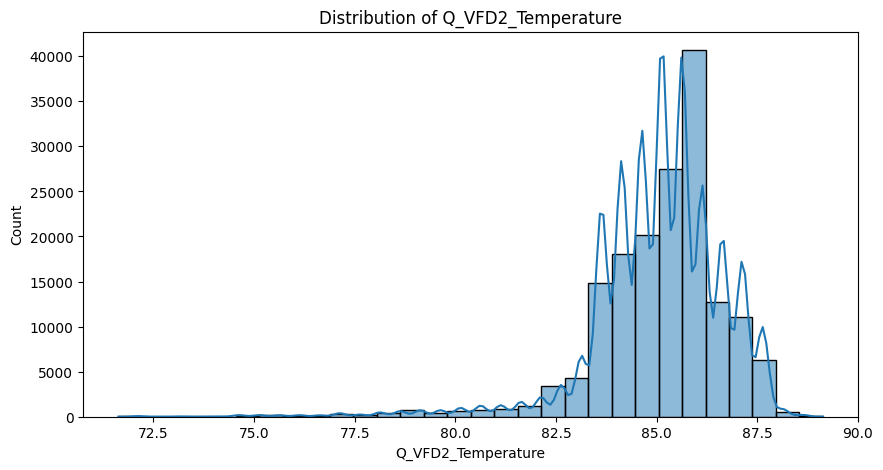

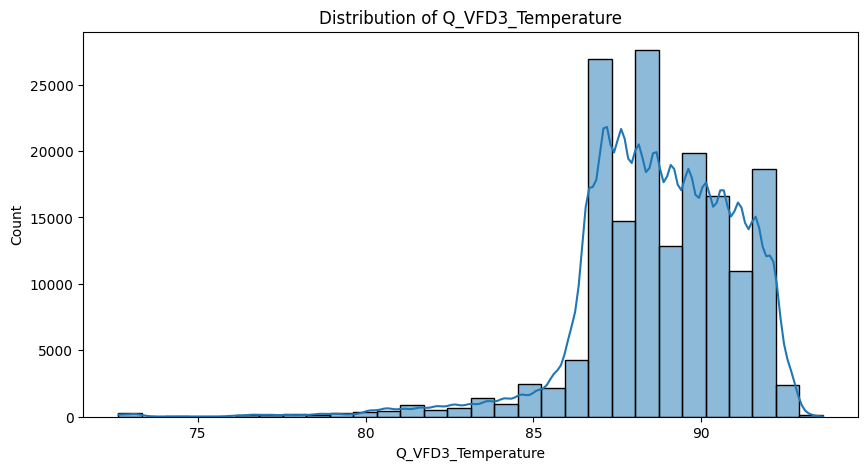

In [11]:
# 1. Distribution Analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns[:3]  # Select first 3 numerical columns

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


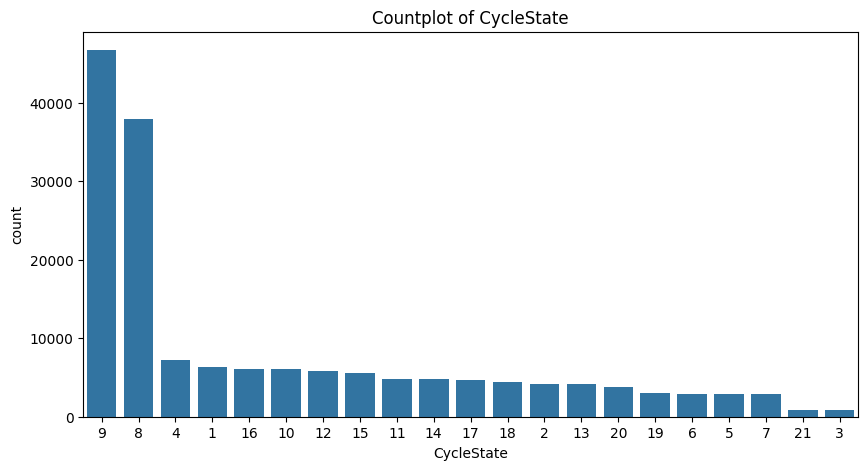

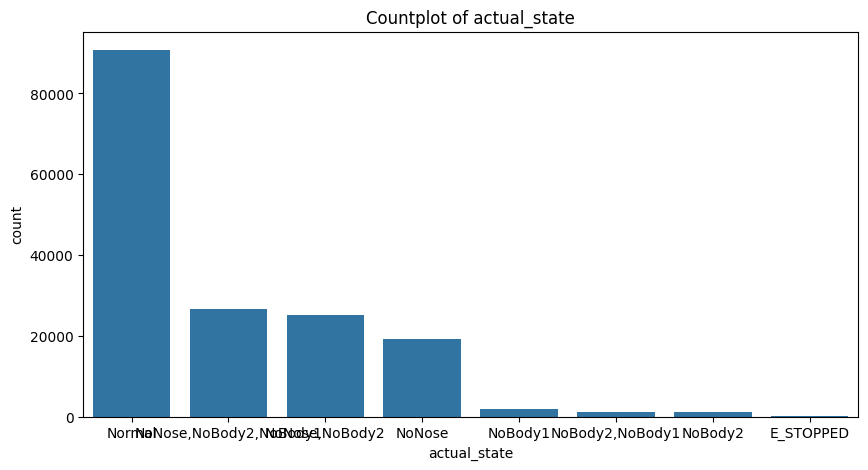

In [13]:
# 2. Categorical Analysis
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
for col in ['CycleState', 'actual_state', 'Cycle_Count_New']:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Countplot of {col}")
        plt.show()


Numeric Columns for Correlation Analysis: Index(['Q_VFD1_Temperature', 'Q_VFD2_Temperature', 'Q_VFD3_Temperature',
       'Q_VFD4_Temperature', 'M_Conv1_Speed_mmps', 'M_Conv2_Speed_mmps',
       'M_Conv3_Speed_mmps', 'M_Conv4_Speed_mmps', 'I_R01_Gripper_Pot',
       'I_R01_Gripper_Load', 'I_R02_Gripper_Pot', 'I_R02_Gripper_Load',
       'I_R03_Gripper_Pot', 'I_R03_Gripper_Load', 'I_R04_Gripper_Pot',
       'I_R04_Gripper_Load', 'M_R01_SJointAngle_Degree',
       'M_R01_LJointAngle_Degree', 'M_R01_UJointAngle_Degree',
       'M_R01_RJointAngle_Degree', 'M_R01_BJointAngle_Degree',
       'M_R01_TJointAngle_Degree', 'M_R02_SJointAngle_Degree',
       'M_R02_LJointAngle_Degree', 'M_R02_UJointAngle_Degree',
       'M_R02_RJointAngle_Degree', 'M_R02_BJointAngle_Degree',
       'M_R02_TJointAngle_Degree', 'M_R03_SJointAngle_Degree',
       'M_R03_LJointAngle_Degree', 'M_R03_UJointAngle_Degree',
       'M_R03_RJointAngle_Degree', 'M_R03_BJointAngle_Degree',
       'M_R03_TJointAngle_Degree', '

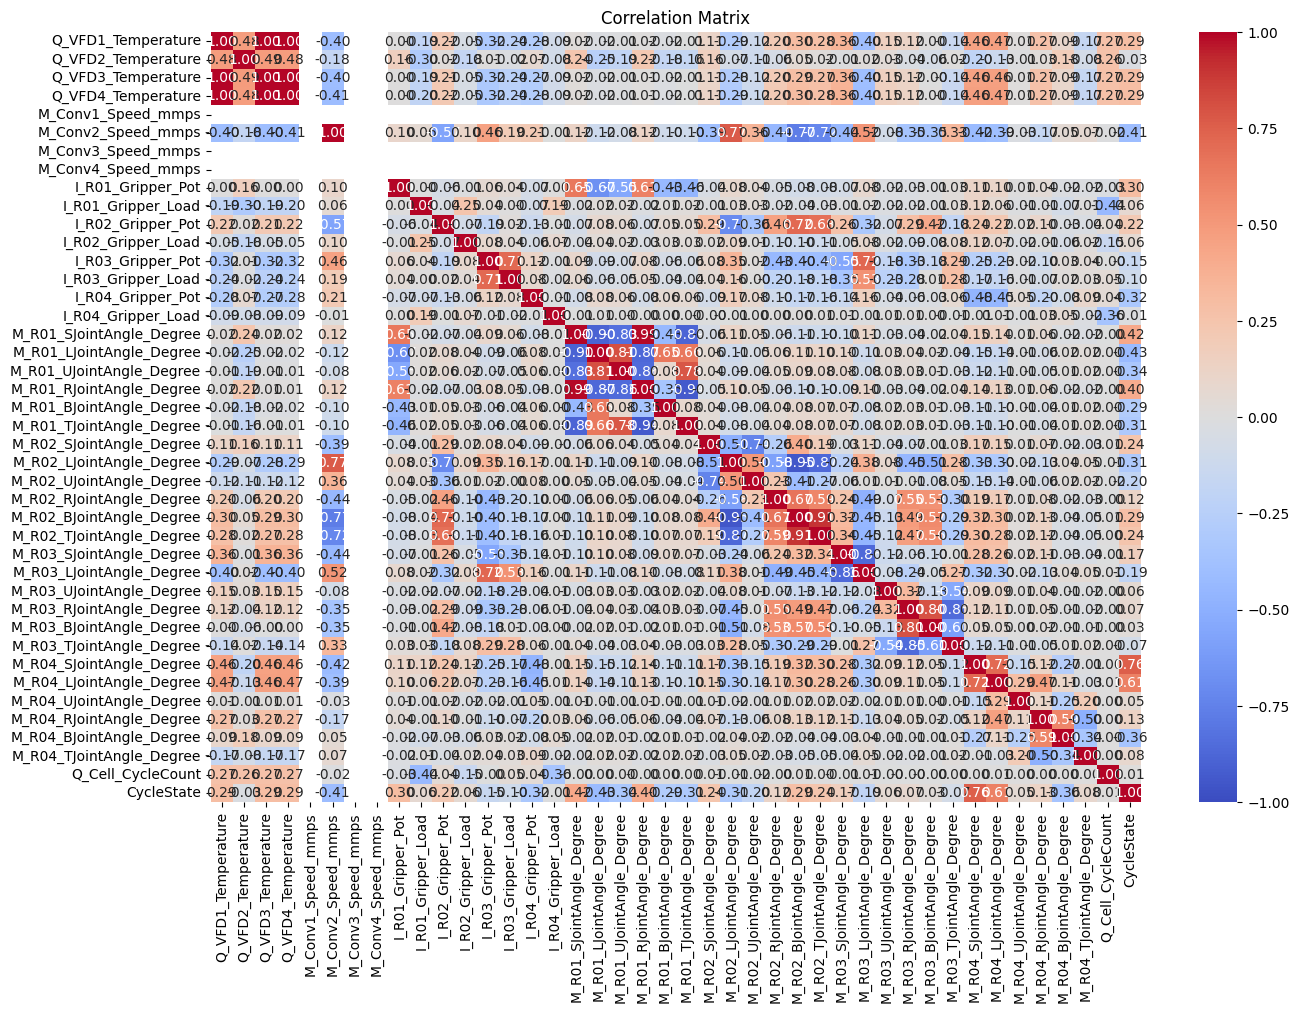

In [14]:

# 4. Correlation Analysis
# Exclude non-numeric columns for correlation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Check for numeric columns to confirm selection
print("Numeric Columns for Correlation Analysis:", numeric_data.columns)

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()



Anomaly Counts:
 actual_state
Normal                    90775
NoNose,NoBody2,NoBody1    26628
NoNose,NoBody2            25206
NoNose                    19307
NoBody1                    1849
NoBody2,NoBody1            1089
NoBody2                    1078
E_STOPPED                    69
Name: count, dtype: int64


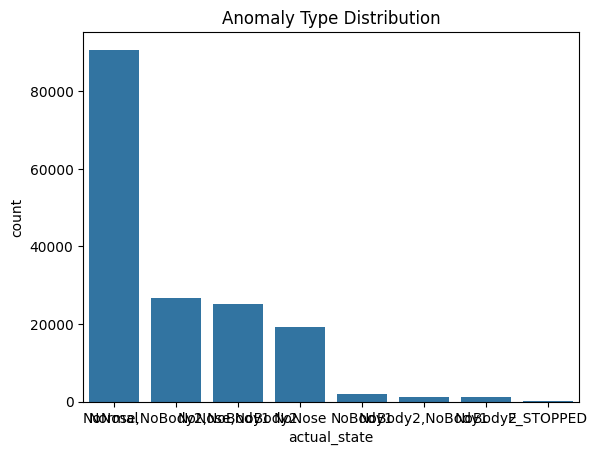

In [15]:
# 6. Anomaly Analysis
anomaly_counts = df['actual_state'].value_counts()
print("\nAnomaly Counts:\n", anomaly_counts)
sns.countplot(data=df, x='actual_state', order=anomaly_counts.index)
plt.title("Anomaly Type Distribution")
plt.show()

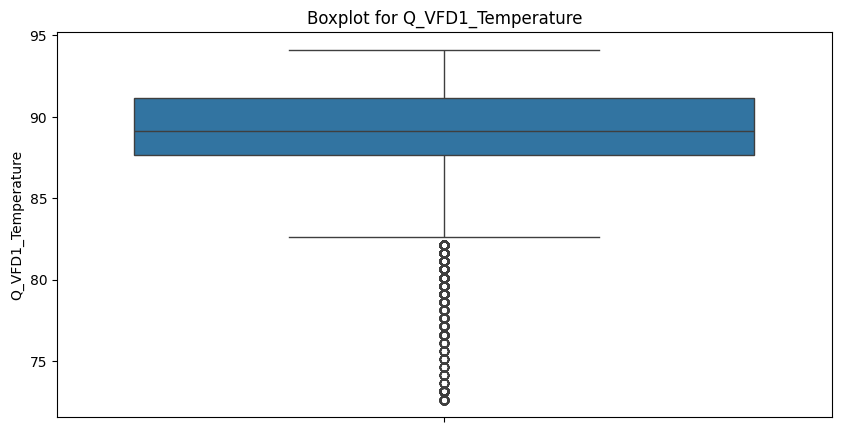

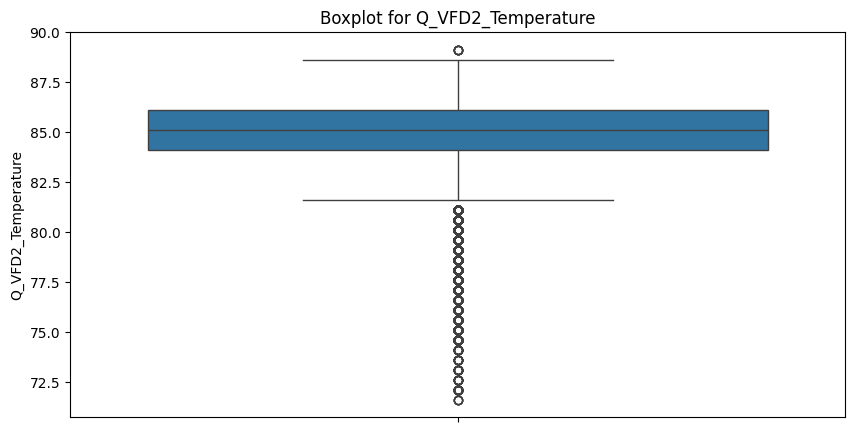

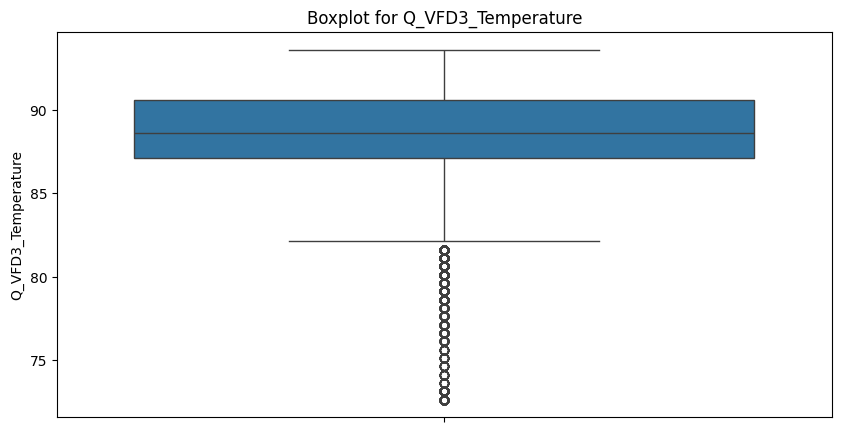

In [16]:
# 7. Outliers Analysis
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

df_subset shape: (11, 49)
               time  Q_VFD1_Temperature  Q_VFD2_Temperature  \
165580  12:22:09 AM           88.630241           87.630257   
165581  12:22:09 AM           89.130241           87.630257   
165582  12:22:10 AM           89.130241           87.630257   
165583  12:22:10 AM           89.130241           87.630257   
165584  12:22:11 AM           89.130241           87.630257   

        Q_VFD3_Temperature  Q_VFD4_Temperature  M_Conv1_Speed_mmps  \
165580           88.630257           88.733398                 111   
165581           88.630257           88.766357                 111   
165582           88.630257           88.810303                 111   
165583           88.630257           88.854248                 111   
165584           88.630257           88.887207                 111   

        M_Conv2_Speed_mmps  M_Conv3_Speed_mmps  M_Conv4_Speed_mmps  \
165580                  83                 111                 111   
165581                  83        

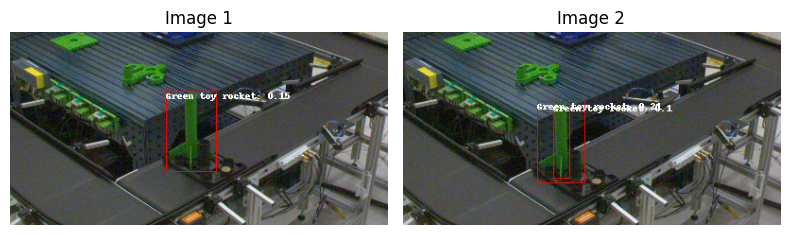

In [18]:
# Select indices between 165580-165590
df_subset = df.loc[165580:165590]

# Debugging: Print df_subset info
print("df_subset shape:", df_subset.shape)
print(df_subset.head())

# Filter for CycleState 9 and actual_state containing 'NoNose'
filtered_df = df_subset[(df_subset['CycleState'] == 9) & (df_subset['actual_state'].str.contains('NoNose'))]

# Debugging: Check filter results
if filtered_df.empty:
    print("No matching rows found!")
else:
    print(filtered_df[['CycleState', 'actual_state', 'Cam1']])

# Extract image filenames
image_filenames = filtered_df['Cam1'].apply(lambda x: os.path.basename(x)).tolist()

# Define the image folder path
image_folder = "/content/drive/MyDrive/Preprocessed_FF_Data/AssemAI/Cycle_state_9/Train/NoNose"
image_paths = [os.path.join(image_folder, filename) for filename in image_filenames]

# Filter only existing images
existing_image_paths = [path for path in image_paths if os.path.exists(path)]

# Debugging: Print paths
print("Filtered Image Filenames:", image_filenames)
print("Full Image Paths:", image_paths)
print("Existing Image Paths:", existing_image_paths)

# If no images exist, print a message and exit
if not existing_image_paths:
    print("No valid images found in the specified range!")
else:
    # Display all images
    fig, axes = plt.subplots(1, len(existing_image_paths), figsize=(4 * len(existing_image_paths), 4))

    # If only one image, make `axes` iterable
    if len(existing_image_paths) == 1:
        axes = [axes]

    for i, image_path in enumerate(existing_image_paths):
        image = Image.open(image_path).convert("RGB")  # Convert to RGB
        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(f"Image {i+1}")

    plt.tight_layout()
    plt.show()


In [19]:
filtered_df

,time,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,I_R01_Gripper_Pot,...,M_R04_BJointAngle_Degree,M_R04_TJointAngle_Degree,I_SafetyDoor1_Status,I_SafetyDoor2_Status,Q_Cell_CycleCount,I_MHS_GreenRocketTray,Cam1,Cam2,CycleState,actual_state
165580,12:22:09 AM,88.630241,87.630257,88.630257,88.733398,111,83,111,111,11186,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165580_0.png,Dataset/BATCH166000/165580_1.png,9,NoNose
165581,12:22:09 AM,89.130241,87.630257,88.630257,88.766357,111,83,111,111,11144,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165581_0.png,Dataset/BATCH166000/165581_1.png,9,NoNose
165582,12:22:10 AM,89.130241,87.630257,88.630257,88.810303,111,83,111,111,11177,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165582_0.png,Dataset/BATCH166000/165582_1.png,9,NoNose
165583,12:22:10 AM,89.130241,87.630257,88.630257,88.854248,111,83,111,111,11186,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165583_0.png,Dataset/BATCH166000/165583_1.png,9,NoNose
165584,12:22:11 AM,89.130241,87.630257,88.630257,88.887207,111,83,111,111,11158,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165584_0.png,Dataset/BATCH166000/165584_1.png,9,NoNose
165585,12:22:11 AM,89.130241,87.630257,88.630257,88.931152,111,83,111,111,11220,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165585_0.png,Dataset/BATCH166000/165585_1.png,9,NoNose
165586,12:22:12 AM,89.130241,87.630257,88.630257,88.975098,111,83,111,111,11187,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165586_0.png,Dataset/BATCH166000/165586_1.png,9,NoNose
165587,12:22:12 AM,89.130241,87.630257,88.630264,89.008057,111,83,111,111,11131,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165587_0.png,Dataset/BATCH166000/165587_1.png,9,NoNose
165588,12:22:13 AM,89.130241,87.630257,88.630264,89.052002,111,83,111,111,11393,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165588_0.png,Dataset/BATCH166000/165588_1.png,9,NoNose
165589,12:22:13 AM,89.130241,87.630257,88.630264,89.095947,111,83,111,111,11151,...,-0.005493,0.0,True,True,254,True,Dataset/BATCH166000/165589_0.png,Dataset/BATCH166000/165589_1.png,9,NoNose


In [20]:
df

,time,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,I_R01_Gripper_Pot,...,M_R04_BJointAngle_Degree,M_R04_TJointAngle_Degree,I_SafetyDoor1_Status,I_SafetyDoor2_Status,Q_Cell_CycleCount,I_MHS_GreenRocketTray,Cam1,Cam2,CycleState,actual_state
0,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5269,...,-0.004120,0.004302,True,True,1,True,Dataset/BATCH1000/000000_0.png,Dataset/BATCH1000/000000_1.png,2,Normal
1,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5277,...,-0.004120,0.004302,True,True,1,True,Dataset/BATCH1000/000001_0.png,Dataset/BATCH1000/000001_1.png,2,Normal
2,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,4914,...,-0.004120,0.004302,True,True,1,True,Dataset/BATCH1000/000002_0.png,Dataset/BATCH1000/000002_1.png,2,Normal
3,12:50:53 AM,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5235,...,-0.004120,0.004302,True,True,1,True,Dataset/BATCH1000/000003_0.png,Dataset/BATCH1000/000003_1.png,2,Normal
4,12:50:53 AM,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5311,...,-0.004120,0.004302,True,True,1,True,Dataset/BATCH1000/000004_0.png,Dataset/BATCH1000/000004_1.png,2,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165996,12:25:40 AM,88.130219,86.130241,87.630241,87.986328,111,111,111,111,11198,...,-0.005493,0.000000,True,True,255,True,Dataset/BATCH166000/165996_0.png,Dataset/BATCH166000/165996_1.png,8,NoNose
165997,12:25:40 AM,88.130219,86.130241,87.630241,87.975342,111,111,111,111,11189,...,-0.005493,0.000000,True,True,255,True,Dataset/BATCH166000/165997_0.png,Dataset/BATCH166000/165997_1.png,8,NoNose
165998,12:25:41 AM,88.130219,86.130241,87.630241,87.964355,111,111,111,111,11249,...,-0.005493,0.000000,True,True,255,True,Dataset/BATCH166000/165998_0.png,Dataset/BATCH166000/165998_1.png,8,NoNose
165999,12:25:41 AM,88.130219,86.130241,87.630241,87.953369,111,111,111,111,11215,...,-0.005493,0.000000,True,True,255,True,Dataset/BATCH166000/165999_0.png,Dataset/BATCH166000/165999_1.png,8,NoNose
